# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Lets start by importing other packages.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Pandas will be used to handle the dataframe; numpy will be used to calculate a few key statistics such as median and standard deviation as well as to draw random samples from the dataset, matplotlib.pyplot and seaborn will be used together to generate the plot.

In [3]:
# Explore

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

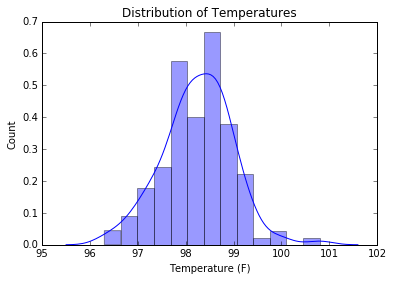

In [4]:
# Plot temperature distribution
sns.distplot(df['temperature'])
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()

In [5]:
# Import normaltest
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)


('chi-square statistic:', 2.7038014333192031)
('p value =', 0.2587479863488254)


In [6]:
# Conduct a hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")

The null hypothesis - that the data comes from a normal distribution - cannot be rejected


#### The distribution of body temperatures is normal, given that the p-value for the normality test is: 0.2587479863488254
#### Given that p > 0.05, The null hypothesis cannot be rejected.

#### ANSWER 1: Yes, the distribution appears to be normally distributed (p-value = 0.259)

## 2. Is the sample size large? Are the observations independent?

In [7]:
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


#### ANSWER 2 : Yes, the sample size is large enough, and the observations are assumed to be independent as the temperature of one person is unrelated to the temperature of another person.

## 3. Is the true population mean really 98.6 degrees F?

In [8]:
# Bootstrap Hypothesis Test
size = 1000
bs_replicates = np.empty(size)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'],len(df['temperature'])))
    
# Compute fraction of replicates that are equal to the 98.6
bs_replicates = np.around(bs_replicates, decimals=1) # Round to 1 decimal place
p = np.sum(bs_replicates == 98.6) / size
print(p)

0


#### The null hypothesis claims that the bootstrap replicate means of body temperature is equal to 98.6.
#### Given that p-value for bootstrap hypothesis test i.e p = 0 , we reject the null hypothesis.

#### One-sample or two-samples?

Another strategy to test if the true population mean is 98.6 degrees F is to employ frequentist statistical testing. For this, we use a one-sample test as we our comparing the mean of our sample of 130 temperature data to a single mean of 98.6.

#### t-score or Z-score?

Z-score is derived from the population standard deviation, while the t-score is derived from the sample standard deviation. Given that we know the sample standard deviation but not necessarily the population standard deviation, the t-score may be more appropriate to use in this case.

Helpful Link: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [9]:
# One-sample t-test
from scipy.stats import ttest_1samp
t, p = ttest_1samp(df['temperature'], popmean=98.6)
print(p)

2.41063204156e-07


#### The null hypothesis claims that the mean body temperatures in our sample is equal to 98.6. Given that p-value for the one-sample t-test is sufficiently small ie p=  2.41063204156e-07 , we reject the null hypothesis.

In [10]:
# One-sample z-test
from statsmodels.stats.weightstats import ztest
t, p = ztest(x1=df['temperature'], value=98.6)
print(p)

4.9021570141e-08


#### The null hypothesis claims that the mean body temperatures in our sample is equal to 98.6. Given that p-value for the one-sample z-test is sufficiently small i.e p= 4.9021570141e-08 , we reject the null hypothesis.

#### Comparing the t-score to z-score

The p-value derived from the z-test is one order of magnitude smaller than the p-value derived from the t-test. This suggests that, if our sample standard deviation is truly representative of the population standard deviation, then it is even more unlikely that the null hypothesis is true.

Below, we repeat the z-test and t-test on a smaller sample of size 10.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [11]:
# Testing on a smaller sample size.

# Draw a small sample of size 10 from the data
small_sample = np.random.choice(df['temperature'], size=10, replace=False)
# Repeating T-test
tt, tp = ttest_1samp(small_sample, popmean=98.6)
# Repeating Z-test
zt, zp = ztest(small_sample, value=98.6)

print('p-value for t-test: ', tp, ', and z-test: ', zp)

('p-value for t-test: ', 0.40739876144315479, ', and z-test: ', 0.38482077352304789)


The correct test to use for a smaller sample size of 10 should be the t-test. Typically, z-score is only relevant for sample sizes that are larger than 30, and for which we know the population standard deviation.

Repeated runs of the t-test and z-test on the smaller sample size of 10 consistently produces lower p-values from the z-test than from the t-test. This is likely due to the fact that the t-test takes into account the degrees of freedom (n-1=129 in this case), whereas the z-test does not take into account the degrees of freedom. In this particular scenario, it seems that if we are able to assume that the sample standard deviation is the population standard deviation and it is appropriate to use the z-test, then we have a higher likelihood of rejecting the null hypothesis.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### Bootstrap Approach

In [12]:
# Compute the 95% Confidence Interval, Bootstrap Replicate Approach
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # Compute Confidence Interval

# Compute Margin of Error, Bootstrap Replicate Approach
margin_of_error = 1.96 * bs_replicates.std()
print("The 95% confidence interval is from ", conf_int[0], " to ", conf_int[1], ".")
print('The margin of error, as computed from the bootstrap replicates, is: ', margin_of_error)
print('Temperatures above and below the confidence interval are considered statistically abnormal.')

('The 95% confidence interval is from ', 98.099999999999994, ' to ', 98.400000000000006, '.')
('The margin of error, as computed from the bootstrap replicates, is: ', 0.13746280829373372)
Temperatures above and below the confidence interval are considered statistically abnormal.


#### Frequentist Aproach

In [13]:
# Compute the 95% Confidence Interval, Frequentist Approach
std_e_t = df['temperature'].std() / np.sqrt(len(df['temperature']))

# Compute Margin of Error, Frequentist Approach
margin_of_error_t = 1.96 * std_e_t # Assuming 95% Confidence
print('The 95% confidence interval is from ', np.mean(df['temperature']) - margin_of_error_t,
      ' to ', np.mean(df['temperature']) + margin_of_error_t, '.')
print('The margin of error, as computed from the t-test method, is: ', margin_of_error_t)
print('Temperatures above and below the confidence interval are considered statistically abnormal.')

('The 95% confidence interval is from ', 98.123194112228489, ' to ', 98.375267426233009, '.')
('The margin of error, as computed from the t-test method, is: ', 0.12603665700226641)
Temperatures above and below the confidence interval are considered statistically abnormal.


## 6. Is there a significant difference between males and females in normal temperature?

To test if there is a significant difference between male and female body temperatures, we use a two-sample t-test. We have two sample distributions (male and female), and a t-test is appropriate given that we do not know the population standard deviations for the two samples.

In [14]:
# Segment population by gender
males = df.loc[(df.gender == 'M')]
females = df.loc[(df.gender == 'F')]

# Perform two-sample t-test
from scipy.stats import ttest_ind
t, p = ttest_ind(males['temperature'], females['temperature'])
print('The null hypothesis claims that the mean body temperatures of males is the same as the mean body temperature of females.')
print('P-value for two-sample t-test: ', p)
print('Given that the p value is sufficiently small, p < 0.05, we reject the null hypothesis.')

The null hypothesis claims that the mean body temperatures of males is the same as the mean body temperature of females.
('P-value for two-sample t-test: ', 0.023931883122395609)
Given that the p value is sufficiently small, p < 0.05, we reject the null hypothesis.


Male body temperatures were found to be statistically different from female body temperatures.